<a href="https://colab.research.google.com/github/Harshnagwani123/ML_TRAINING/blob/main/ML_DAY_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [17]:
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Price'] = data.target

In [18]:
X = df[['MedInc']]
y = df['Price']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [21]:
y_pred = lr.predict(X_test)
print("Coef (w):", lr.coef_, "Intercept (b):", lr.intercept_)
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2:", r2_score(y_test, y_pred))

Coef (w): [0.41933849] Intercept (b): 0.4445972916907879
MSE: 0.7091157771765549
R2: 0.45885918903846656


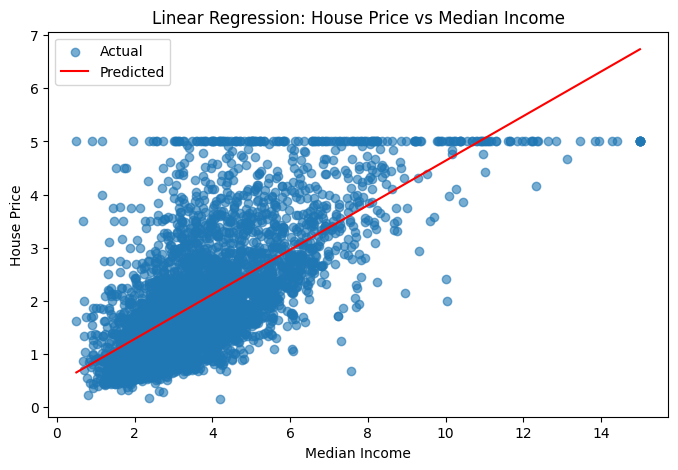

In [37]:
plt.figure(figsize=(8,5))
plt.scatter(X_test, y_test, alpha=0.6, label="Actual")
plt.plot(np.sort(X_test.values.flatten()), lr.predict(X_test.sort_values(by='MedInc')), color='red', label="Predicted")
plt.xlabel("Median Income")
plt.ylabel("House Price")
plt.title("Linear Regression: House Price vs Median Income")
plt.legend()
plt.show()

In [23]:
import numpy as np
import pandas as pd

In [24]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [25]:
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Price'] = data.target

In [26]:
X = df[['MedInc']]
y = df['Price']

In [27]:
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Price'] = data.target

In [28]:
X = df[['MedInc']]
y = df['Price']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
degree = 2
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

In [31]:
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_mse_scores = -cv_scores
print("Cross-validation MSE scores:", cv_mse_scores)
print("Mean cross-validation MSE:", cv_mse_scores.mean())

Cross-validation MSE scores: [0.70082282 0.66892867 0.70451129 0.68547315 0.70590859]
Mean cross-validation MSE: 0.693128904415193


In [32]:
model.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [33]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Test set MSE:", mse)
print("Test set R2 score:", r2)

Test set MSE: 0.7032732680932143
Test set R2 score: 0.46331772769346236


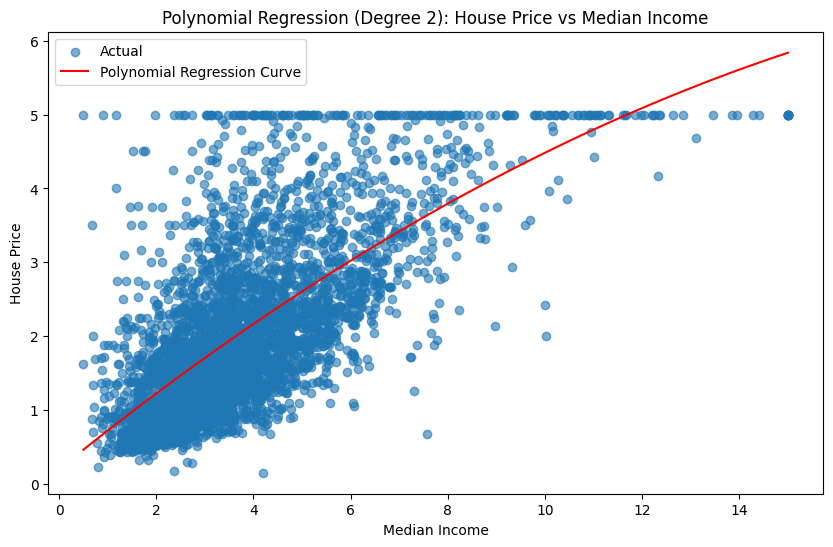

In [38]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, alpha=0.6, label='Actual')

X_plot = np.linspace(X_test['MedInc'].min(), X_test['MedInc'].max(), 100).reshape(-1, 1)
y_plot = model.predict(pd.DataFrame(X_plot, columns=['MedInc']))
plt.plot(X_plot, y_plot, color='red', label='Polynomial Regression Curve')

plt.xlabel('Median Income')
plt.ylabel('House Price')
plt.title(f'Polynomial Regression (Degree {degree}): House Price vs Median Income')
plt.legend()
plt.show()